# 量子计算基础知识
Written by MindQuantum Team
<br>
1. 量子力学基本概念<br>
   1.1 量子比特<br>
   1.2 量子态<br>
   1.3 物理量与算符<br>
   1.4 多比特量子态<br>
2. 量子操作<br>
   2.1 常见的单比特量子门<br>
   2.2 双比特量子门<br>
3. 量子线路<br>
   3.1 Bell态的制备线路<br>
   3.2 量子化学模拟的量子线路<br>
4. 作业<br>
   4.1 多比特的量子态矢量张量乘积计算<br>
   4.2 基本单比特旋转门之间的变换关系<br>
   4.3 $|0>+|1>$态做Y门<br><br>

## 1. 量子力学基本概念
### 1.1 量子比特
经典比特：<br>
比特状态：0或1<br>
硬件实现：晶体管<br>
控制方式：利用电压或电流控制<br>
硬件成熟度：高，目前芯片晶体管密度达到$100 MTr/mm^2$<br>
![jupyter](images/fig/classic_bit.png)

量子比特：<br>
比特状态：可以在0和1之间连续变化，态空间是连续的<br>
硬件实现：多种线路同步发展（超导/离子阱/光量子等）<br>
成熟度：较低，目前规模约在单芯片100比特以内<br>
![jupyter](images/fig/quantum_bit.png)

### 1.2 量子态
量子比特的状态的一般数学形式
$$
|\psi\rangle = \alpha | 0\rangle + \beta |1\rangle\tag{1},
$$
其中$\alpha,\beta$为对应本征态的概率幅：
$$
|\alpha|^2 + |\beta|^2 = 1,
$$
$|\psi \rangle$为量子态的狄拉克符号表示，分为左矢(bra, $\langle\psi|$)和右矢(ket, $|\psi\rangle$):
$$
|\psi\rangle = \left(\begin{matrix} \alpha \\ \beta \end{matrix}\right), \langle\psi| = \left( \alpha^* ,  \beta^* \right)
$$
$$
|0\rangle = \left(\begin{matrix} 1 \\ 0 \end{matrix}\right) , |1\rangle = \left(\begin{matrix} 0 \\ 1 \end{matrix}\right)
$$
左矢为对应右矢的厄密共轭(Hermitian conjugate):
$$
\langle\psi| = (|\psi\rangle)^{\dagger} = \left(\begin{matrix} \alpha \\ \beta \end{matrix}\right)^{\dagger} = \left(\begin{matrix} \alpha^* \\ \beta^* \end{matrix}\right)^{T} = \left( \alpha^* ,  \beta^* \right)
$$
量子态符合现行代数的计算法则：
内积：
$$
\langle \psi |\psi \rangle
= \left( \alpha^* ,  \beta^* \right)  \left(\begin{matrix} \alpha \\ \beta \end{matrix}\right) 
= \alpha^*\alpha + \beta^*\beta 
= |\alpha|^2 + |\beta|^2 = 1
$$
外积：
$$
|\psi\rangle \langle\psi| 
=  \left(\begin{matrix} \alpha \\ \beta \end{matrix}\right)\left( \alpha^* ,  \beta^* \right)  
= \left(\begin{matrix}
\alpha\alpha^* & \alpha \beta^* \\
\beta\alpha^* & \beta\beta^*
\end{matrix}\right)
$$
更一般地，在现行空间中，两个态的内积
$$
\langle\phi|\psi\rangle = \left( a^* ,  b^* \right) \left(\begin{matrix} c \\ d \end{matrix}\right) = a^*c + b^*d \le 1
$$
称为两个态的保真度(fidelity)

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
from mindquantum import Circuit, Simulator, Hamiltonian, QubitOperator
from mindquantum import X, Y, Z, I
import numpy as np

In [2]:
sim1 = Simulator(backend='projectq', n_qubits=2)
sim2 = Simulator(backend='projectq', n_qubits=2)

#利用模拟器计算两个态的保真度
sim1.reset()
print(sim1.get_qs(True))
sim1.apply_gate(X.on(0))
print(sim1.get_qs(True))

#sim1.reset()
ops = sim2.get_expectation_with_grad(Hamiltonian(QubitOperator('')), circ_right=Circuit(), simulator_left=sim1)
print(ops(np.array([])))

1¦00⟩
1¦01⟩
(array([[0.+0.j]]), array([], shape=(1, 1, 0), dtype=complex128))


In [3]:
# 利用numpy计算两个态的保真度
s1 = sim1.get_qs()
s2 = sim2.get_qs()
F = np.matmul(s1, s2)
F

0j

### 1.3 物理量与算符
在量子力学中，物理量以算符的形式表示，数学上通常表示为一个矩阵。在系统的某一个态下，由于态本身会受测量改变，物理量对应的值也会随之改变。因此对于某一个任意的量子态，其物理量会有对应的期望值(Expectation)
$$
\langle \psi |O|\psi\rangle = \left( a^* ,  b^* \right)
\left(\begin{matrix} o_{11} & o_{12} \\ o_{21} & o_{22} \end{matrix}\right)
\left(\begin{matrix} c \\ d \end{matrix}\right)
$$

In [4]:
sim1.reset()
sim1.get_expectation(Hamiltonian(QubitOperator('Z0 Z1')))

(1+0j)

### 1.4 多比特量子态
对于多比特量子态，利用线性代数中的张量乘法(tensor product /Kronecker product)，可以从单比特的计算空间扩展到多比特空间
$$
|\psi \rangle \otimes |\phi\rangle = \left(\begin{matrix} a \\ b \end{matrix}\right) \otimes \left(\begin{matrix} c \\ d \end{matrix}\right)
= \left(\begin{matrix} c\left(\begin{matrix} a \\ b \end{matrix}\right) \\ d\left(\begin{matrix} a \\ b \end{matrix}\right) \end{matrix}\right)
= \left(\begin{matrix} ac \\ ad \\ bc \\ bd \end{matrix}\right)
$$
考虑量子本征态在空间中的排列可以得到，对于$|\psi \rangle \otimes |\phi\rangle$ 有
$$
\begin{pmatrix} ac \\ ad \\ bc \\ bd \end{pmatrix} \rightarrow
\begin{Bmatrix} |00\rangle \\ |01\rangle \\ |10\rangle\\ |11\rangle \end{Bmatrix} 
$$
量子计算的态空间为$2^N$
![jupyter](images/fig/space.png)

## 2 量子操作
对量子态的控制，可以一般性地表示为：
$$
|\psi_1\rangle = U_1|\psi_0\rangle
$$
其中$U_1$为量子操作或量子门(quantum gate)，理想的量子门操作具有幺正性(Unitarity)
$$
U^{\dagger}U = I \rightarrow U^{\dagger}=U^{-1},
$$
或
$$
\langle \psi_1| \psi_1\rangle = \langle\psi_0| U^{\dagger}U|\psi_0\rangle = 1
$$
### 2.1 常见的单比特量子门
$$
X|0\rangle = \begin{pmatrix} 0 & 1 \\1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle,
$$
$$
X|1\rangle = \begin{pmatrix} 0 & 1 \\1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle,
$$
$$
Z|\psi\rangle = \begin{pmatrix} 1 & 0 \\0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} 
= \begin{pmatrix} a \\ -b \end{pmatrix}
= \begin{pmatrix} a \\ e^{-i\pi}b \end{pmatrix}
=a|0\rangle + e^{-i\pi}b|1\rangle
$$
$$ Y = \begin{pmatrix} 0 & -i \\i & 0 \end{pmatrix}.$$

In [5]:
from mindquantum import X, Y, Z
sim = Simulator('projectq', 1)
Y.matrix()

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

利用量子力学中的对易关系(commutation relationship)，可以进行一些量子门之间的相互转化：
$$\left[ X, Y\right] = XY-YX=2iZ,$$
$$\left[ Y, Z\right] = YZ-ZY=2iX,$$
$$\left[ Z, X\right] = ZX-XZ=2iY,$$
$$ \left[ X, X\right] = \left[ Y, Y\right] = \left[ Z, Z\right] = 0$$

In [6]:
# [X,Y] = 2iZ
ym = Y.matrix()
xm = X.matrix()
(np.matmul(xm, ym) - np.matmul(ym, xm))/2j

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.-0.j]])

H门(Hadamard gate):
$$
H = \frac1{\sqrt{2}} \begin{pmatrix} 1 & 1 \\1 & -1 \end{pmatrix} = \frac1{\sqrt{2}} (X + Z)
$$
![jupyter](images/fig/hadamard.png)

In [7]:
# Hadamard 门作用在 0 态上
from mindquantum import H
sim.reset()
sim.apply_gate(H.on(0))
sim.get_qs()

array([0.70710678+0.j, 0.70710678+0.j])

更一般地，考虑量子态在比特翻转的基础上，做出某个特定角度$\theta$的旋转,如绕X轴旋转
$$
R_x(\theta) = e^{-i\frac{\theta}2X},
$$
其中对于矩阵的指数形式计算，可以利用
$$
e^A=I + A + \frac1{2!}A^2 + ...
$$
展开，且注意到$X^2 = I$, 则可以得到
$$
R_x(\theta) \begin{split}
&= I + \left( -i\frac{\theta}2X\right) + \frac1{2!}\left( -i\frac{\theta}2X\right)^2+...\\
&=\left( 1-\frac1{2!}\left( \frac{\theta}2\right)^2 +... \right)I - iX\left( 1 - \frac1{3!}\left(\frac{\theta}2\right)+... \right)\\
&= I \cos{\frac{\theta}2} - iX\sin{\frac{\theta}2}\\
&= \begin{pmatrix} \cos{\frac{\theta}2} & - i\sin{\frac{\theta}2} \\- i\sin{\frac{\theta}2} & \cos{\frac{\theta}2} \end{pmatrix}
\end{split}
$$
![jupyter](images/fig/bloch3d-blank.png)

In [8]:
#量子态绕着X轴旋转，当theta=pi/2
from mindquantum import RX
sim = Simulator('projectq', 1)
sim.apply_gate(RX(np.pi/2).on(0))
sim.get_qs()

array([0.70710678+0.j        , 0.        -0.70710678j])

任意方向的单比特旋转门：
$$
R_n(\varphi) = e^{-i\frac{\varphi}2 \vec{n}\cdot \vec{\sigma}}
=I\cos{\frac{\varphi}2} - i (\vec{n}\cdot \vec{\sigma})\sin{\frac{\varphi}2}.
$$
加上全局相位$\alpha$，可以得到任意单比特操作的数学表示：
$$
U = e^{i\alpha}R_n(\varphi)
$$

### 2.2 双比特量子门
$$
CNOT = \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
$$
这样的量子操作矩阵作用在两比特的量子态上会发生什么？
$$
CNOT|00\rangle = \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}  = |00\rangle,
$$
同样地
$$CNOT|01\rangle = |01\rangle,$$
$$CNOT|10\rangle = |11\rangle,$$
$$CNOT|11\rangle = |10\rangle.$$
### 当比特1在0态时，比特2不变；当比特1在1态时，比特2翻转

In [9]:
from mindquantum import X

# 11->10
sim1.set_qs(np.array([0,0,0,1]))
sim1.apply_gate(X.on(0, 1))
sim1.get_qs(True)

'1¦10⟩'

同时，CNOT门也可以表示为一个映射的形式
$$
|x,y\rangle \rightarrow |x,y\oplus x\rangle
$$
![jupyter](images/fig/cnot.png)

通常不同的双比特门可以相互转化，如对于SWAP门
$$
SWAP = \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}= CNOT * CNOT * CNOT
$$
![jupyter](images/fig/swap_cnot.png)

其他常见多比特门：
CZ(CPhase)门：(与CNOT之间的变换？）
$$
CZ = \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{pmatrix}
$$
![jupyter](images/fig/cz.png)

Toffoli(CC-NOT)门：
![jupyter](images/fig/toffoli.png)

其中$U=X=V^2$, $V=(1-i)(I+iX)/2$ (Proof it!)

In [10]:
#与CNOT一样，CZ门与Z门用了相同的接口
from mindquantum import Z
Z.on(1,2)

Z(1 <-: 2)

## 3 量子线路
对量子比特进行一系列的操作，形成的量子门组合，称为量子线路(Quantum Circuit)。从工程的角度，把任意的量子操作分解为简单操作的组合是对于扩大计算规模是必须的。
### 3.1 Bell态的制备线路
![jupyter](images/fig/bellstate.png)

Example:
$$
CNOT * (H\otimes I)|00\rangle = \frac1{\sqrt{2}}CNOT(|0\rangle + |1\rangle)|0\rangle = \frac1{\sqrt{2}}(|00\rangle+|11\rangle)
$$

In [11]:
#制备其中一个bell state
from mindquantum import Simulator, Circuit, H, X
sim = Simulator('projectq', 2)
circ = Circuit([H.on(0), X.on(1,0)])
sim.reset()
sim.apply_circuit(circ)
sim.get_qs(True)


'√2/2¦00⟩\n√2/2¦11⟩'

### 3.2 量子化学模拟的量子线路
基于变分量子求解器(Variational quantum eigensolver)算法的量子化学模拟线路，一个比较常见的线路设计方案UCCSD(Unitary coupled clusters singles and doubles)

Note: 
openfermion为第三方程序包，用于读取化学分子的hdf5文件，可以在终端中通过pip安装：

>>pip install openfermion

In [12]:
from openfermion.chem import MolecularData
molecule = MolecularData(filename='./H2.hdf5')
molecule.load()

from mindquantum.algorithm import generate_uccsd
ansatz_circuit, \
init_amp, \
params_name, \
hamiltonian, \
n_qubits, \
n_electrons = generate_uccsd(molecule)
ansatz_circuit.summary()

ccsd:-1.1299048942783592.
fci:-1.1299047843229135.
=========Circuit Summary=========
|Total number of gates  : 204.  |
|Parameter gates        : 12.   |
|with 2 parameters are  :       |
|p0, p1                        .|
|Number qubit of circuit: 4     |


In [13]:
ansatz_circuit

q0: ──RX(π/2)────●─────────────────────────●────RX(7π/2)───────H───────●────────────────────────●───────H────────RX(π/2)────●──────────────────────────────────────●────RX(7π/2)────RX(π/2)────●───────────────────────────────────────●────RX(7π/2)───────H───────●───────────────────────────────────────●───────H───────────H───────●───────────────────────────────────────●───────H────────RX(π/2)────●──────────────────────────────────────●────RX(7π/2)────RX(π/2)────●──────────────────────────────────────●────RX(7π/2)───────H───────●──────────────────────────────────────●───────H───────────H───────●───────────────────────────────────────●───────H─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                 │                         │                           │                        │                           │                                      │                           │                                       │                           │                                       │                           │                                       │                           │                                      │                           │                                      │                           │                                      │                           │                                       │
q1: ─────────────X────●───────────────●────X───────────────────────────X────●──────────────●────X────RX(π/2)────────────────X────●────────────────────────────●────X────RX(7π/2)───────H───────X────●─────────────────────────────●────X───────H───────────H───────X────●─────────────────────────────●────X───────H────────RX(π/2)────X────●─────────────────────────────●────X────RX(7π/2)───────H───────X────●────────────────────────────●────X───────H────────RX(π/2)────X────●────────────────────────────●────X────RX(7π/2)────RX(π/2)────X────●────────────────────────────●────X────RX(7π/2)───────H───────X────●─────────────────────────────●────X───────H────────RX(π/2)────●─────────────────────────●────RX(7π/2)───────H───────●────────────────────────●───────H──────
                      │               │                                     │              │                                     │                            │                                     │                             │                                     │                             │                                     │                             │                                     │                            │                                     │                            │                                     │                            │                                     │                             │                                │                         │                           │                        │
q2: ─────H────────────X────RZ(-p0)────X────────────H────────RX(π/2)─────────X────RZ(p0)────X─────────RX(7π/2)────RX(π/2)─────────X────●──────────────────●────X─────────RX(7π/2)────RX(π/2)─────────X────●───────────────────●────X─────────RX(7π/2)────RX(π/2)─────────X────●───────────────────●────X─────────RX(7π/2)────RX(π/2)─────────X────●───────────────────●────X─────────RX(7π/2)───────H────────────X────●──────────────────●────X────────────H───────────H────────────X────●──────────────────●────X────────────H───────────H────────────X────●──────────────────●────X────────────H───────────H────────────X────●───────────────────●────X────────────H───────────────────X────●───────────────●────X───────────────────────────X────●──────────────●────X──────────────
                                                                                                                                      │                  │                                               │                   │                                               │                   │                                               │  

q0: ──H────ZZ(beta_0)────ZZ(beta_0)────RX(alpha_0)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
               │             │
q1: ──H────ZZ(beta_0)────────┼──────────ZZ(beta_0)────ZZ(beta_0)────RX(alpha_0)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                             │              │             │
q2: ──H──────────────────────┼──────────ZZ(beta_0)────────┼──────────ZZ(beta_0)────ZZ(beta_0)────RX(alpha_0)────────────────────────────────────────────────────────────────────────────────────────────────────────
                             │                            │              │             │
q3: ──H──────────────────ZZ(beta_0)───────────────────────┼──────────ZZ(beta_0)────────┼──────────ZZ(beta_0)────ZZ(beta_0)────RX(alpha_0)───────────────────────────────────────────────────────────────────────────
                                                          │                            │              │             │
q4: ──H───────────────────────────────────────────────ZZ(beta_0)───────────────────────┼──────────ZZ(beta_0)────────┼──────────ZZ(beta_0)────ZZ(beta_0)────RX(alpha_0)──────────────────────────────────────────────
                                                                                       │                            │              │             │
q5: ──H────────────────────────────────────────────────────────────────────────────ZZ(beta_0)───────────────────────┼──────────ZZ(beta_0)────────┼──────────ZZ(beta_0)────ZZ(beta_0)────RX(alpha_0)─────────────────
                                                                                                                    │                            │              │             │
q6: ──H─────────────────────────────────────────────────────────────────────────────────────────────────────────ZZ(beta_0)───────────────────────┼──────────ZZ(beta_0)────────┼──────────ZZ(beta_0)────RX(alpha_0)──
                                                                                                                                                 │                            │              │
q7: ──H──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────ZZ(beta_0)───────────────────────┼──────────ZZ(beta_0)────RX(alpha_0)──
                                                                                                                                                                              │
q8: ──H───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────ZZ(beta_0)────RX(alpha_0)─────────────────

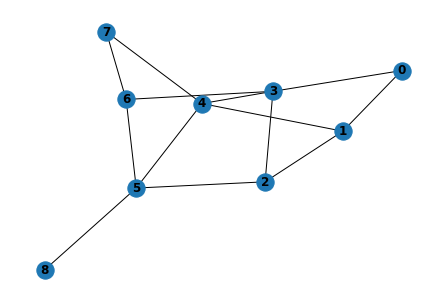

In [14]:
from mindquantum import MaxCutAnsatz
import networkx as nx
from scipy.optimize import minimize

def func(x, grad_ops):
    '''
    Function for optimization
    '''
    f, g = grad_ops(x)
    return np.real(f[0]), g[0][0]

# random graph
nnodes = 9
p = 0.1
g = []
for n1 in range(nnodes):
    for n2 in range(n1+1,nnodes):
        #print(n1, n2)
        if np.random.random() > p:
            if (abs(n1 - n2) == 1) or  (abs(n1 - n2) == 3):
                g.append((n1, n2))

nx.draw(nx.Graph(g), with_labels=True, font_weight='bold')

maxcut = MaxCutAnsatz(g, depth=1)
circ0 = maxcut.circuit
circ0

## 4. 作业
## 4.1 多比特的量子态矢量张量乘积计算
$$|\psi \rangle \otimes |\phi\rangle = \left(\begin{matrix} a \\ b \end{matrix}\right) \otimes \left(\begin{matrix} c \\ d \end{matrix}\right)
= \left(\begin{matrix} c\left(\begin{matrix} a \\ b \end{matrix}\right) \\ d\left(\begin{matrix} a \\ b \end{matrix}\right) \end{matrix}\right)
= \left(\begin{matrix} ac \\ ad \\ bc \\ bd \end{matrix}\right)
$$

In [15]:
def kron(state_list):
    res = state_list[0]
    for state in state_list[1:]:
        res = np.kron(res, state)
    return res

import numpy as np
s0 = np.array([1, 0]).transpose()
s1 = np.array([0, 1]).transpose()
s00 = np.kron(s0, s0)
s001 = kron([s0, s0, s1])
print(s001)

[0 1 0 0 0 0 0 0]


## 4.2 基本单比特旋转门之间的变换关系
量子力学中的对易关系(commutation relationship)，可以进行一些量子门之间的相互转化：
$$\left[ X, Y\right] = XY-YX=2iZ,$$
$$\left[ Y, Z\right] = YZ-ZY=2iX,$$
$$\left[ Z, X\right] = ZX-XZ=2iY,$$
$$ \left[ X, X\right] = \left[ Y, Y\right] = \left[ Z, Z\right] = 0$$
以及反对易关系(anti-commutation relationship):
$$\{ X, Y\} =XY + YX = 0,$$
$$\{ Z, Y\} =ZY + YZ = 0,$$
$$\{ X, Z\} =XZ + ZX = 0,$$
如
$$YZY|\psi\rangle = -Z|\psi\rangle$$

In [16]:
from mindquantum import Simulator, Circuit, X, Y, Z
#任意态
s0 = np.array([0.25, 0.1])

sim = Simulator('projectq', 1)
sim.set_qs(s0)
print(sim.get_qs())

#YZY
circ1 = Circuit([Y.on(0), Z.on(0), Y.on(0)])
sim.apply_circuit(circ1)
print(sim.get_qs())

#Z
sim.set_qs(s0)
sim.apply_gate(Z.on(0))
print(sim.get_qs())

[0.92847669+0.j 0.37139068+0.j]
[-0.92847669+0.j  0.37139068+0.j]
[ 0.92847669+0.j -0.37139068+0.j]


## 4.3 $|0>+|1>$态做Y门
$$
Y(|0\rangle + |1\rangle) = 
\begin{bmatrix}
0 & -i \\ i &0
\end{bmatrix}
\begin{bmatrix}
1 \\ 1
\end{bmatrix}
$$


In [17]:
from mindquantum import Simulator, Circuit, Y
sim = Simulator('projectq', 1)
sim.set_qs(np.array([1,1]))
sim.apply_gate(Y.on(0))
sim.get_qs()

array([0.-0.70710678j, 0.+0.70710678j])